# Building Machine Learning Models

## Part 4: Building a XGBoost model.

This `Part 4` will build a XGBoost model with a dataset prepared from `Part 1`.
1. Loading the data for modeling prepard by`Part 1`. 
2. Building a XGBoost model using `GridSearchCV` (tuning included).
3. Evaluating a XGBoostmodel using a confusion matrix and various other plots.

### 1. Loading the data

#### 1.1. Import packages

Import relevant Python packages.

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
    confusion_matrix, ConfusionMatrixDisplay
    
import matplotlib.pyplot as plt

#### 1.2. Load the dataset

`Pandas` is used to load the `Galactico_Airline_prepared.csv`. The resulting pandas `DataFrame` is saved in a variable named `df`.

In [2]:
df = pd.read_csv('Galactico_Airline_prepared.csv').drop(columns=['Unnamed: 0'])
df

,satisfaction,Age,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,...,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel
0,1,65,1,265,0,0,0,2,2,4,...,3,5,3,2,0,0.0,1,0,0,1
1,1,47,3,2464,0,0,0,3,0,2,...,4,2,3,2,310,305.0,1,0,0,1
2,1,15,1,2138,0,0,0,3,2,0,...,4,4,4,2,0,0.0,1,0,0,1
3,1,60,1,623,0,0,0,3,3,4,...,1,4,1,3,0,0.0,1,0,0,1
4,1,70,1,354,0,0,0,3,4,3,...,2,4,2,5,0,0.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,1,29,1,1731,5,5,5,3,2,5,...,4,4,4,2,0,0.0,0,1,0,1
129483,0,63,3,2087,2,3,2,4,2,1,...,3,1,2,1,174,172.0,0,1,0,1
129484,0,69,1,2320,3,0,3,3,3,2,...,4,2,3,2,155,163.0,0,1,0,1
129485,0,66,1,2450,3,2,3,2,3,2,...,3,2,1,2,193,205.0,0,1,0,1


### 2. Building a XGBoost model

#### 2.1. Create the training and testing data

Put `75%` of the data into a `training` set and the remaining `25%` into a `testing` set. 

In [3]:
y = df['satisfaction']
X = df.drop(columns=['satisfaction'], axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((97115, 23), (32372, 23), (97115,), (32372,))

#### 2.2. Set hyperparameters (model tuning)

* Determine a set of hyperparameters for tuning the model.

In [5]:
# 21 was the best max_depth for decision tree model in Part 2
#  2 was the best max_samples_leaf for decision tree model in Part 2
cv_params = {
    'max_depth': [10,21,50],
    'n_estimators': [50,100],
    'min_child_weight': [2,3,5],
    'learning_rate': [0.1,0.2,0.3],
    'subsample': [0.7],
    'colsample_bytree': [0.7]
}

In [6]:
scoring={'accuracy','precision','recall','f1'}

#### 2.3. Build and fit the XGBoost model
1. Use `GridSearchCV` to search over the specified parameters.
2. Fit the model.

Note: It would take up to 30 minutes.

In [7]:
# Use `GridSearchCV` to search over the specified parameters.
xgb = XGBClassifier(objective='binary:logistic', random_state=0)
xgb_cv = GridSearchCV(estimator=xgb,
                      param_grid=cv_params,
                      cv=5,
                      scoring=scoring,
                      refit='f1',
                      n_jobs=-1,
                      verbose=1)

In [8]:
# Fit the model.
xgb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [10, 21, 50],
                         'min_child_weight': [2, 3, 5],
                         'n_estimators': [50, 100], 'subsample': [0.7]},
             refit='f1', scoring={'recall', 'f1', 'precision', 'accuracy'},
             verbose=1)

#### 2.4. Obtain the optimal parameters

In [9]:
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 50,
 'min_child_weight': 2,
 'n_estimators': 100,
 'subsample': 0.7}

#### 2.5. Optimize the model and fit it.

Build the optimized model using the optimal parameters found via `GridSearchCV`.

In [10]:
xgb_opt = XGBClassifier(objective='binary:logistic',
                       random_state=0,
                       colsample_bytree=0.7,
                       learning_rate=0.1,
                    #    max_depth=10,
                       max_depth=50,
                    #    min_child_weight=3,
                       min_child_weight=2,
                       n_estimators=100,
                       subsample=0.7)

In [11]:
xgb_opt.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=50, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [12]:
y_pred = xgb_opt.predict(X_test)

#### 2.6. Review the metrics

Obtain the XGBoost model's metrics:
* `accuracy`
* `precision`
* `recall`
* `f1`

In [13]:
accuracy = accuracy_score(y_pred=y_pred, y_true=y_test)
precision = precision_score(y_pred=y_pred, y_true=y_test)
recall = recall_score(y_pred=y_pred, y_true=y_test)
f1 = f1_score(y_pred=y_pred, y_true=y_test)

print('accuracy:\t', accuracy)
print('precision:\t', precision)
print('recall:\t\t', recall)
print('f1:\t\t', f1)

accuracy:	 0.956536513035957
precision:	 0.9687553845270231
recall:		 0.9513254371122392
f1:		 0.959961298767821


#### 2.7. Store the result

1. Create `results`, a dataframe & put the metrics into it.
2. Read `ml_results.csv` and assign it to `model_results`, a dataframe object.
3. Append `result` into `model_results`.
4. Store the dataframe to `CSV` file.

In [16]:
# Create `results`, a dataframe & put the metrics into it.
result = pd.DataFrame([{
    'Model': 'Tuned XGBoost',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1': f1
}])
result

,Model,Accuracy,Precision,Recall,F1
0,Tuned XGBoost,0.956537,0.968755,0.951325,0.959961


In [17]:
# Read `ml_results.csv` and assign it to `model_results`, a dataframe object.
model_results = pd.read_csv('ml_results.csv').drop(columns='Unnamed: 0', axis=1)
model_results

,Model,Accuracy,Precision,Recall,F1
0,Decision Tree,0.934388,0.941696,0.938297,0.939993
1,Tuned Decision Tree,0.938465,0.951619,0.935129,0.943295
2,Tuned Random Forest,0.942914,0.950988,0.944444,0.947705


In [18]:
# Append `result`, XGBoost metrics, to `model_results`, a main dataframe.
model_results = pd.concat([model_results, result], ignore_index=True)
model_results

,Model,Accuracy,Precision,Recall,F1
0,Decision Tree,0.934388,0.941696,0.938297,0.939993
1,Tuned Decision Tree,0.938465,0.951619,0.935129,0.943295
2,Tuned Random Forest,0.942914,0.950988,0.944444,0.947705
3,Tuned XGBoost,0.956537,0.968755,0.951325,0.959961


In [19]:
# Store the dataframe to a `ml_results.csv` file.
model_results.to_csv('ml_results.csv')

### 3. Evaluating XGBoost model

#### 3.1. Concept of 4 metrics
* `Accuracy` (TP+TN/TP+FP+FN+TN): The ratio of correctly predicted observations to total observations. It tends to be the metric that stakeholders can best understand.

* `Precision` (TP/TP+FP): The ratio of correctly predicted positive observations to total predicted positive observations.

* `Recall` (Sensitivity, TP/TP+FN): The ratio of correctly predicted positive observations to all observations in actual class.

* `F1`: The harmonic average of precision and recall, which takes into account both false positives and false negatives.

#### 3.2. Produce a confusion matrix

Analyzing the types of errors made by an algorithm. To obtain the information, produce a `confusion matrix`.

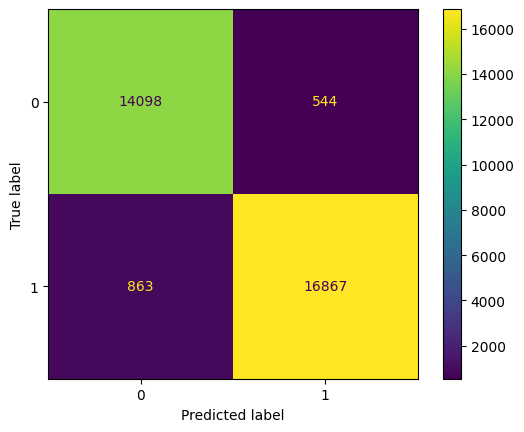

In [20]:
cm = confusion_matrix(y_pred=y_pred, y_true=y_test, labels=xgb_opt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_opt.classes_)
disp.plot();

In [21]:
result

,Model,Accuracy,Precision,Recall,F1
0,Tuned XGBoost,0.956537,0.968755,0.951325,0.959961


#### 3.3. Analyze the Matrics of the two models
- Both show `high` proportion of `true positives` and `true negatives`.
- Both show `low` proportion of `false positives` and `false negatives`.

#### 3.4. Build a feature importance graph

Check out which features might be important to the XGBoost model by building a feature importance graph.

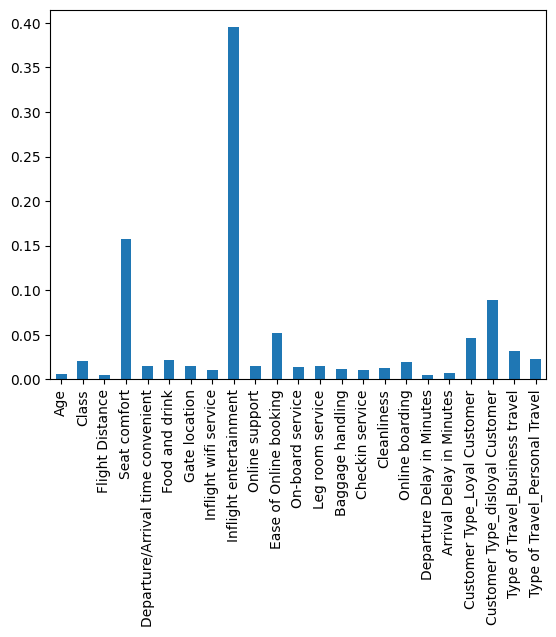

In [22]:
importances = xgb_opt.feature_importances_
forest_importances = pd.Series(importances, index=xgb_opt.feature_names_in_)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

The feature importance graph shows the top three feature for this model.
1. `Inflight entertainment`
2. `Seat comfort`
3. `Customer Type_disloyal Customer`
<!-- 3. `Ease of Online booking` -->

Comparison to the decision tree models
- `Customer Type_disloyal Customer` value becomes the 3rd important feature.

Comparison to the random forest model
- Overall, the values increased by approximately `40%`.
- `Customer Type_disloyal Customer` value becomes the 3rd important feature.

#### 3.5. Summary
- The XGBoost model predicted satisfaction with more than `95.6%` accuracy. The precision is over `96.8%` and the recall is approximately `95.1%`.
- Particularly, a better `F1` score indicates that the XGBoost model may do better at classification when taking into account `false positives` and `false negatives`.

In [23]:
model_results

,Model,Accuracy,Precision,Recall,F1
0,Decision Tree,0.934388,0.941696,0.938297,0.939993
1,Tuned Decision Tree,0.938465,0.951619,0.935129,0.943295
2,Tuned Random Forest,0.942914,0.950988,0.944444,0.947705
3,Tuned XGBoost,0.956537,0.968755,0.951325,0.959961


### Considerations

Takeaways
* `F1` scores are usually more useful than accuracy scores. 
* If the cost of `false positives` and `false negatives` are very different, it’s better to use the `F1` score and combine the information from `precision` and `recall`.
* The XGBoost model yields a more effective performance than the decision tree models & the random forest model.
* In particular, `Customer Type_disloyal Customer` is the 3rd important feature in the only `XGBoost` model. More research would be necessary tyo figure out the reason why this model has the different result from others. 

Recommendations to stakeholders
* The XGBoost model outperformed both the tuned decision tree & the random forest with the best hyperparameters in most of the four scores. This indicates that the XGBoost model may perform better.
* Because stakeholders were interested in learning about the factors that are most important to customer satisfaction, this would be shared based on the tuned XGBoost.

#### References

The Nuts and Bolts of Machine Learning: Build a XGBoost model (Coursera)
https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/ungradedLab/Avpeb/exemplar-build-an-xgboost-model